In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Train"
valid_path = "C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Test"

In [13]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Train/*')

In [12]:
folders

['C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Train\\Parasite',
 'C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Train\\Uninfected']

In [14]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [16]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [19]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [22]:
training_set

In [23]:
test_set = test_datagen.flow_from_directory( "C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\shapunya vemula\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 23s 2s/step - loss: 1.9784 - accuracy: 0.4983 - val_loss: 0.7832 - val_accuracy: 0.3358
Epoch 2/50
13/13 [==============================] - 20s 1s/step - loss: 0.6618 - accuracy: 0.5364 - val_loss: 0.6865 - val_accuracy: 0.6045
Epoch 3/50
13/13 [==============================] - 18s 1s/step - loss: 0.5652 - accuracy: 0.6806 - val_loss: 0.8009 - val_accuracy: 0.3955
Epoch 4/50
13/13 [==============================] - 18s 1s/step - loss: 0.4692 - accuracy: 0.7690 - val_loss: 1.0414 - val_accuracy: 0.3806
Epoch 5/50
13/13 [==============================] - 18s 1s/step - loss: 0.4054 - accuracy: 0.8049 - val_loss: 0.7662 - val_accuracy: 0.5000
Epoch 6/50
13/13 [==============================] - 18s 1s/step - loss: 0.4080 - accuracy: 0.7955 - val_loss: 0.9053 - val_accuracy: 0.4627
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.3998 - accuracy: 0.8101 - val_loss: 0.6635 - val_accuracy: 0.5896
Epoch 8/50
13/13 [==

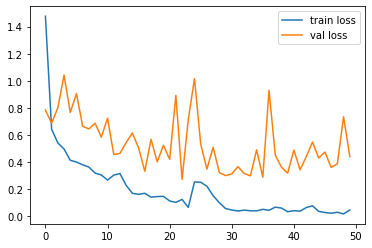

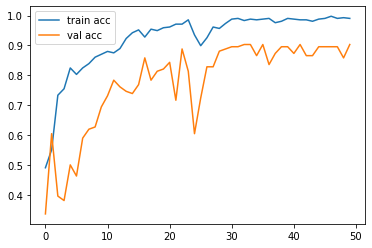

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [28]:
y_pred = model.predict(test_set)

In [29]:
y_pred

array([[1.00000000e+00, 4.08431200e-09],
       [2.73264042e-04, 9.99726713e-01],
       [9.37053740e-01, 6.29462823e-02],
       [1.00000000e+00, 4.77588913e-10],
       [4.69755832e-05, 9.99953032e-01],
       [3.02156695e-05, 9.99969840e-01],
       [1.00000000e+00, 2.56533041e-11],
       [9.99999881e-01, 1.45140774e-07],
       [1.00000000e+00, 6.63523094e-18],
       [1.34468656e-02, 9.86553133e-01],
       [9.60148391e-05, 9.99903917e-01],
       [1.00000000e+00, 2.29517712e-16],
       [9.99997020e-01, 3.01536056e-06],
       [9.99999642e-01, 3.70949522e-07],
       [9.99972463e-01, 2.75045131e-05],
       [8.92877579e-05, 9.99910712e-01],
       [2.21919821e-04, 9.99778092e-01],
       [2.19817623e-03, 9.97801840e-01],
       [1.00000000e+00, 1.87464154e-16],
       [1.00000000e+00, 1.71102069e-23],
       [9.99997735e-01, 2.30774481e-06],
       [3.23586399e-04, 9.99676466e-01],
       [9.49372712e-04, 9.99050677e-01],
       [9.99985933e-01, 1.40170314e-05],
       [1.148387

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model=load_model('model_vgg19.h5')

In [34]:
img=image.load_img("C:/Users/shapunya vemula/Desktop/dataset/malaria detection/Dataset/Test/Uninfected/2.png",target_size=(224,224))

In [35]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

In [41]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
